# Marketing Campaign Analysis – Full Solution Notebook

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme(style='whitegrid')

In [21]:
file_path = "marketing_data.csv"
df = pd.read_csv(file_path)

# df = pd.read_csv('marketing_data.csv')
print(df.head())

      ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [22]:
if 'Income' in df.columns:
    df['Income'] = (
        df['Income'].astype(str)
        .str.replace('$','',regex=False)
        .str.replace(',','',regex=False)
        .str.replace(' ','',regex=False)
        .replace(['','None','nan','N/A'], np.nan)
    ).astype(float)
print(df['Income'].head())

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [23]:
if 'Kidhome' in df.columns and 'Teenhome' in df.columns:
    df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
if 'Year_Birth' in df.columns:
    df['Age'] = 2015 - df['Year_Birth']
mnt_cols = [c for c in df.columns if c.startswith('Mnt')]
if mnt_cols:
    df['TotalSpending'] = df[mnt_cols].sum(axis=1)
purchase_cols = [c for c in ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'] if c in df.columns]
if purchase_cols:
    df['TotalPurchases'] = df[purchase_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalChildren,Age,TotalSpending,TotalPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,0,45,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,0,54,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,1,57,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,2,48,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,1,0,SP,1,26,91,6


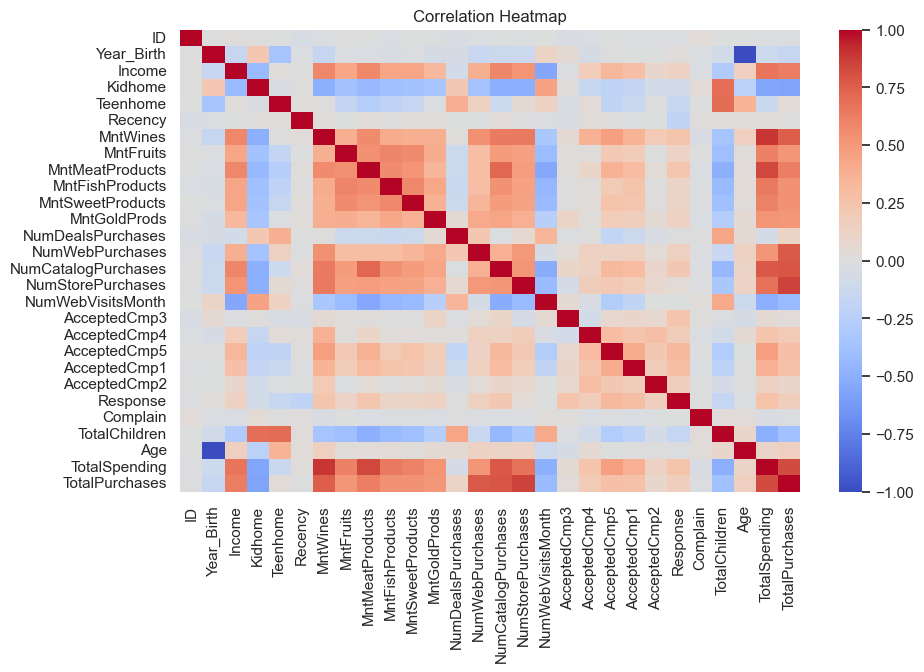

In [24]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
if 'Age' in df.columns and 'NumStorePurchases' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,35,50,120], labels=['Young','Middle','Older'])
    older = df[df['AgeGroup']=='Older']['NumStorePurchases'].dropna()
    young = df[df['AgeGroup']=='Young']['NumStorePurchases'].dropna()
    if len(older)>1 and len(young)>1:
        t,p = stats.ttest_ind(older,young,equal_var=False)
        print('H1: Older vs Young Store Purchases:', t,p)

H1: Older vs Young Store Purchases: 5.777545343399552 1.0559597537352001e-08
